# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [316]:
#%pip install --upgrade plotly

###  Import Statements


In [317]:
import pandas as pd
import numpy as np
import scipy

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Notebook Presentation

In [318]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 999

# Load the Data



In [319]:
df = pd.read_csv('NLSY97_subset.csv')
df_desc = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [320]:
df[:3]

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [321]:
selected_dataframe = df
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n sample data: \n{selected_dataframe.sample(5)}')

df analysis: 
 shape: (2000, 96), rows: 2000, columns: 96
 columns names are: ID, EARNINGS, S, EXP, FEMALE, MALE, BYEAR, AGE, AGEMBTH, HHINC97, POVRAT97, HHBMBF, HHBMOF, HHOMBF, HHBMONLY, HHBFONLY, HHOTHER, MSA97NO, MSA97NCC, MSA97CC, MSA97NK, ETHBLACK, ETHHISP, ETHWHITE, EDUCPROF, EDUCPHD, EDUCMAST, EDUCBA, EDUCAA, EDUCHSD, EDUCGED, EDUCDO, PRMONM, PRMONF, PRMSTYUN, PRMSTYPE, PRMSTYAN, PRMSTYAE, PRFSTYUN, PRFSTYPE, PRFSTYAN, PRFSTYAE, SINGLE, MARRIED, COHABIT, OTHSING, FAITHN, FAITHP, FAITHC, FAITHJ, FAITHO, FAITHM, ASVABAR, ASVABWK, ASVABPC, ASVABMK, ASVABNO, ASVABCS, ASVABC, ASVABC4, VERBAL, ASVABMV, HEIGHT, WEIGHT04, WEIGHT11, SF, SM, SFR, SMR, SIBLINGS, REG97NE, REG97NC, REG97S, REG97W, RS97RURL, RS97URBN, RS97UNKN, JOBS, HOURS, TENURE, CATGOV, CATPRI, CATNPO, CATMIS, CATSE, COLLBARG, URBAN, REGNE, REGNC, REGW, REGS, MSA11NO, MSA11NCC, MSA11CC, MSA11NK, MSA11NIC
 NaN values: True AGEMBTH, HHINC97, POVRAT97, PRMONM, PRMONF, PRMSTYUN, PRMSTYPE, PRMSTYAN, PRMSTYAE, PRFSTYUN, PRFSTYPE

In [322]:
print(f'Number of duplicated rows is: {len(df[df.duplicated()])}')

Number of duplicated rows is: 513


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [323]:
df.drop_duplicates(inplace=True) #removing duplicated rows

In [324]:
# Key Variables Analysis: "S" Years of schooling (highest grade completed as of 2011)

In [325]:
df['S'].nlargest(5)

28     20
71     20
95     20
99     20
135    20
Name: S, dtype: int64

In [326]:
df['S'].nsmallest(5)

716    6
26     8
40     8
64     8
73     8
Name: S, dtype: int64

In [327]:
print(f'Number of missing data: {df["S"].isna().sum()}')

Number of missing data: 0


In [328]:
# Key Variables Analysis: "EXP" Total out-of-school work experience (years) as of the 2011 interview.

In [329]:
df['EXP'].nlargest(5)

1819   14.73
1386   14.42
720    14.27
62     13.92
723    13.87
Name: EXP, dtype: float64

In [330]:
df['EXP'].nsmallest(5)

20     0.00
71     0.00
1073   0.00
1108   0.00
1265   0.00
Name: EXP, dtype: float64

In [331]:
print(f'Number of missing data: {df["EXP"].isna().sum()}')

Number of missing data: 0


In [332]:
# Key Variables Analysis: "EARNINGS" Current hourly earnings in $ reported at the 2011 interview

In [333]:
df['EARNINGS'].nlargest(5)

135   132.89
246   123.08
567   100.00
109    96.15
484    96.15
Name: EARNINGS, dtype: float64

In [334]:
df['EARNINGS'].nsmallest(5)

1355   2.00
252    2.13
454    2.13
529    2.13
783    2.13
Name: EARNINGS, dtype: float64

In [335]:
print(f'Number of missing data: {df["EARNINGS"].isna().sum()}')

Number of missing data: 0


## Descriptive Statistics

In [336]:
# Key Variables Analysis: "S" Years of schooling (highest grade completed as of 2011)

In [337]:
df['S'].describe() #Years of schooling

count   1,487.00
mean       14.56
std         2.77
min         6.00
25%        12.00
50%        15.00
75%        16.00
max        20.00
Name: S, dtype: float64

In [338]:
df['EXP'].describe() #Total out-of-school work experience (years)

count   1,487.00
mean        6.70
std         2.86
min         0.00
25%         4.65
50%         6.63
75%         8.71
max        14.73
Name: EXP, dtype: float64

In [339]:
df['EARNINGS'].describe() #Current hourly earnings in $ reported

count   1,487.00
mean       18.81
std        12.00
min         2.00
25%        11.41
50%        15.75
75%        22.60
max       132.89
Name: EARNINGS, dtype: float64

## Visualise the Features

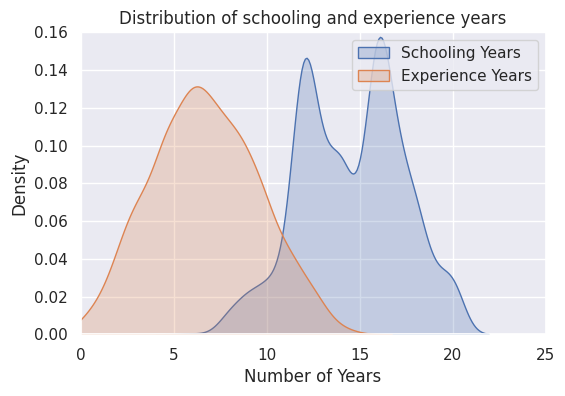

In [340]:
plt.figure(dpi=100)
sns.kdeplot(df['S'], 
            shade=True,
            label='Schooling Years')
sns.kdeplot(df['EXP'], 
            shade=True,
            label='Experience Years')
plt.title('Distribution of schooling and experience years')
plt.xlim(0, 25)
plt.ylim(0, 0.16)
plt.xlabel('Number of Years')
plt.legend()
plt.show()

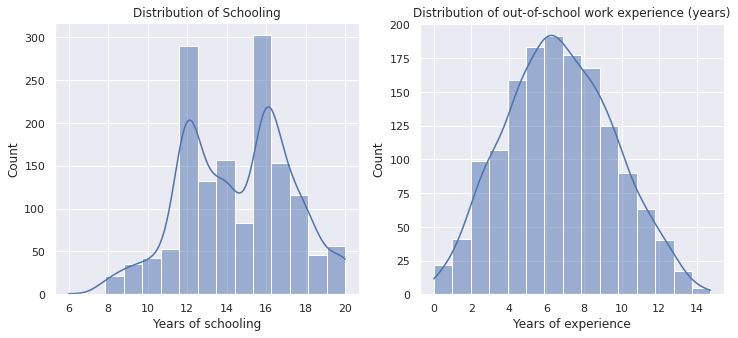

In [341]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='S', bins=15, kde=True, ax=ax[0])
ax[0].set_xlabel('Years of schooling')
ax[0].set_title('Distribution of Schooling')

sns.histplot(data=df, x='EXP', bins=15, kde=True, ax=ax[1])
ax[1].set_xlabel('Years of experience')
ax[1].set_title('Distribution of out-of-school work experience (years)')

plt.show()

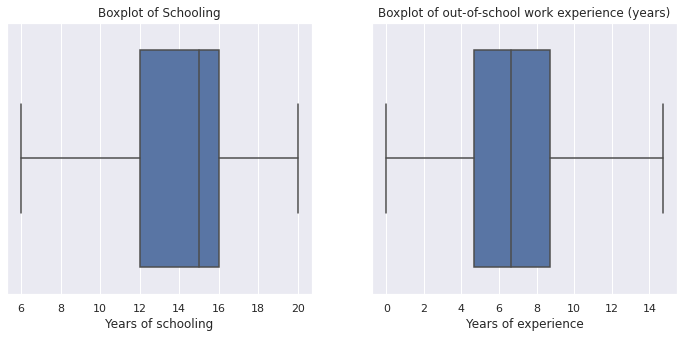

In [342]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='S', ax=ax[0])
ax[0].set_xlabel('Years of schooling')
ax[0].set_title('Boxplot of Schooling')

sns.boxplot(data=df, x='EXP', ax=ax[1])
ax[1].set_xlabel('Years of experience')
ax[1].set_title('Boxplot of out-of-school work experience (years)')

plt.show()

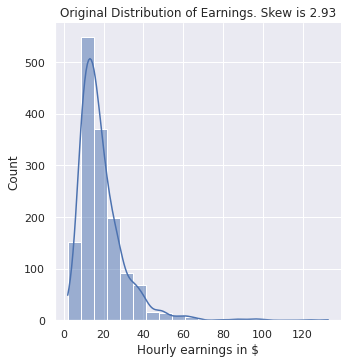

In [343]:
skew = df['EARNINGS'].skew()
sns.displot(data=df,
             x=df['EARNINGS'],
             bins=20,
            kde=True,)
plt.xlabel('Hourly earnings in $')
plt.title(f'Original Distribution of Earnings. Skew is {skew:.3}')
plt.show()

In [344]:
# Dealing with outliers, removing top, high earnings

In [345]:
df = df[df['EARNINGS'] < df['EARNINGS'].quantile(0.9)]

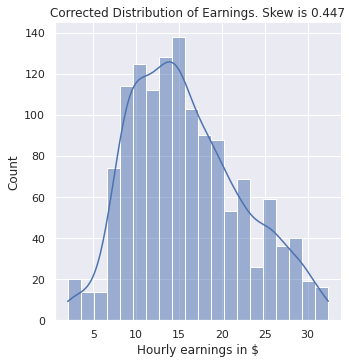

In [346]:
skew = df['EARNINGS'].skew()
sns.displot(data=df,
             x=df['EARNINGS'],
             bins=20,
            kde=True,)
plt.xlabel('Hourly earnings in $')
plt.title(f'Corrected Distribution of Earnings. Skew is {skew:.3}')
plt.show()

In [347]:
# after cutting outliers skew is much smaller

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [348]:
#crating dataframe with selected columns
sdf = df[["S", "EXP", "EARNINGS"]].copy()

In [349]:
sdf.isna().sum()

S           0
EXP         0
EARNINGS    0
dtype: int64

In [350]:
sdf.dtypes

S             int64
EXP         float64
EARNINGS    float64
dtype: object

In [351]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

features = sdf.drop('EARNINGS', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    sdf['EARNINGS'], 
                                                    test_size=0.2, 
                                                    random_state=10)
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [352]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
X = pd.DataFrame(X_train['S'])
y = pd.DataFrame(y_train)
regression.fit(X, y)
print(f'regression.coef: {regression.coef_}')
print(f'regression.intercept: {regression.intercept_}')
print(f'r-squared for the regression on the training data / regression.score: {regression.score(X, y):.2}')

regression.coef: [[0.75299338]]
regression.intercept: [4.9915576]
r-squared for the regression on the training data / regression.score: 0.11


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [353]:
print(f'For an additional year of schooling one expect to earn additional: {float(np.round(regression.coef_, 2))}$.')


For an additional year of schooling one expect to earn additional: 0.75$.


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [354]:
predicted_values = regression.predict(X_train["S"].values.reshape(-1, 1))


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [355]:
predicted_values[:5]

array([[15.53346488],
       [15.53346488],
       [18.54543838],
       [20.05142514],
       [17.03945163]])

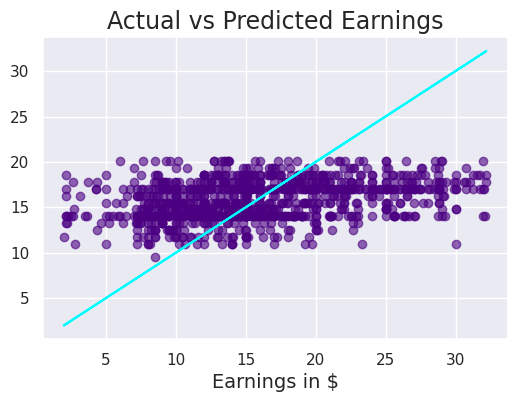

In [356]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan') # linia 45 stopni
plt.title(f'Actual vs Predicted Earnings', fontsize=17)
plt.xlabel('Earnings in $', fontsize=14)
plt.show()

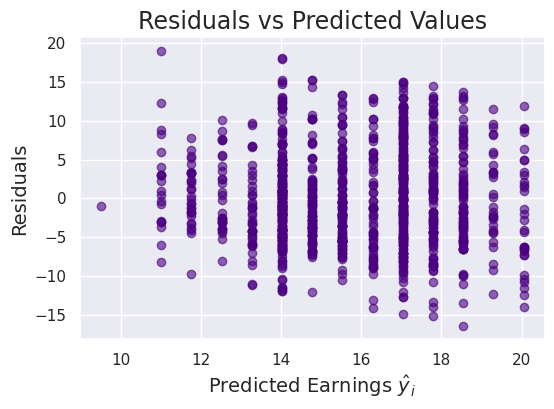

Residuals mean: -1.3413984357340208e-15


In [357]:
if len(predicted_values.shape) > 1:
    predicted_values = predicted_values.flatten()
if len(y_train.shape) > 1:
    residuals = (y_train - predicted_values).flatten()
else:
    residuals = y_train - predicted_values

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()
print(f'Residuals mean: {residuals.mean()}')

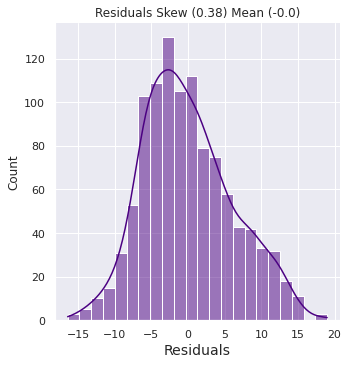

In [358]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.xlabel('Residuals', fontsize=14)
plt.show()

# Use log Earnings

In [359]:
new_target = np.log(sdf['EARNINGS'])
features = sdf.drop('EARNINGS', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features, 
                                                    new_target, 
                                                    test_size=0.2, 
                                                    random_state=10)
from sklearn.linear_model import LinearRegression
logregression = LinearRegression()

X = pd.DataFrame(X_train['S'])
y = pd.DataFrame(log_y_train)

# # Find the best-fit line
logregression.fit(X, y)
print(f'regression.coef: {logregression.coef_}')
print(f'regression.intercept: {logregression.intercept_}')
print(f'r-squared for the regression on the training data / regression.score: {logregression.score(X, y)}')

regression.coef: [[0.05025685]]
regression.intercept: [1.94471737]
r-squared for the regression on the training data / regression.score: 0.09216511990075416


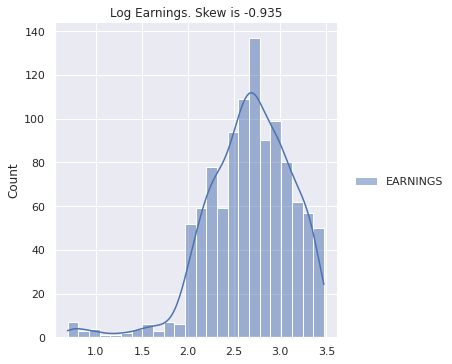

In [360]:
sns.displot(y, kde=True)
plt.title(f'Log Earnings. Skew is {log_y_train.skew():.3}')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


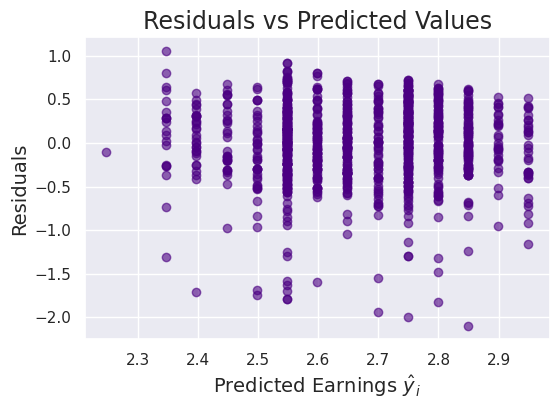

Residuals mean: 6.076136478696184e-16


In [361]:
predicted_values = logregression.predict(X.values.reshape(-1, 1))
if len(predicted_values.shape) > 1:
    predicted_values = predicted_values.flatten()
if len(y_train.shape) > 1:
    residuals = (log_y_train - predicted_values).flatten()
else:
    residuals = log_y_train - predicted_values
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()
print(f'Residuals mean: {residuals.mean()}')

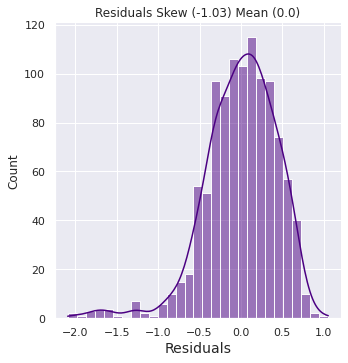

In [362]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.xlabel('Residuals', fontsize=14)
plt.show()

Conclusion: Log Earnings gives worst results compared to normal Eearnings

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [363]:
sdf.head()

,S,EXP,EARNINGS
0,12,9.71,18.50
1,17,5.71,19.23
3,18,1.54,16.80
5,12,8.02,13.14
6,13,9.79,10.00


In [364]:
from sklearn.linear_model import LinearRegression
regression2 = LinearRegression()

features2 = sdf.drop('EARNINGS', axis=1)
new_target2 = sdf['EARNINGS'] 

X_train, X_test, y_train, y_test = train_test_split(features2, 
                                                    new_target2, 
                                                    test_size=0.2, 
                                                    random_state=10)
X = pd.DataFrame(X_train)
y = pd.DataFrame(y_train) 
regression2.fit(X, y)
regression2.coef_
regression2.intercept_
rsquared2 = regression2.score(X, y)
print(f'r-squared for the regression on the training data / regression.score: {regression2.score(X, y):.2}')


r-squared for the regression on the training data / regression.score: 0.16


### Evaluate the Coefficients of the Model

In [365]:
print(f'regression.coef: {regression2.coef_}')
print(f'By adding second variable, r-squared increased. Both coefficients of the model have + sign so increasing schooling or experience will benefir earnings.')

regression.coef: [[1.11992329 0.61170269]]
By adding second variable, r-squared increased. Both coefficients of the model have + sign so increasing schooling or experience will benefir earnings.


In [366]:
regr_coef = pd.DataFrame(data=regression2.coef_.T.flatten(), index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.12
EXP,0.61


In [367]:
print(f'The increase of earnings for an extra schooling unit is ${regr_coef.iloc[0][0]:.3}')
print(f'The increase of earnings for an extra experience unit is ${regr_coef.iloc[1][0]:.2}')


The increase of earnings for an extra schooling unit is $1.12
The increase of earnings for an extra experience unit is $0.61


### Analyse the Estimated Values & Regression Residuals

In [368]:
predicted_values = regression2.predict(X_train)

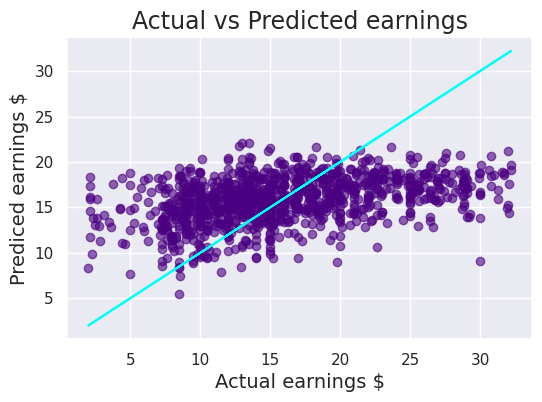

In [369]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan') # linia 45 stopni
plt.title(f'Actual vs Predicted earnings', fontsize=17)
plt.xlabel('Actual earnings $', fontsize=14)
plt.ylabel('Prediced earnings $', fontsize=14)
plt.show()

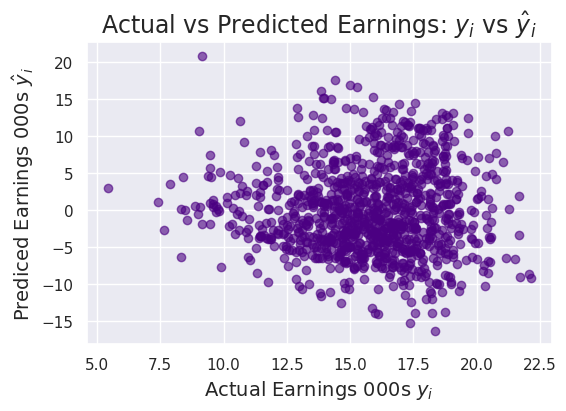

In [370]:
residuals = y_train - predicted_values.flatten()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

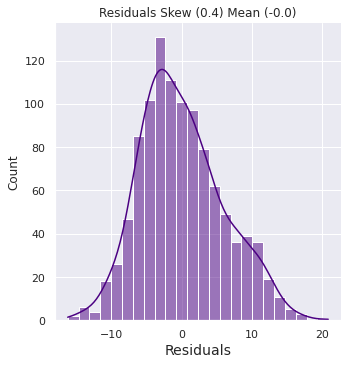

In [371]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.xlabel('Residuals', fontsize=14)
plt.show()

In [372]:
# Model with two variables seems to be good and well defined, skew and mean is near 0.

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [373]:
# Define Prediction Characteristics
new_data = pd.DataFrame(data=[[16,5]],columns=['S','EXP'])

# Make prediction
earn_estimate = regression2.predict(new_data)[0]
print(f'The earnings estimate is ${earn_estimate[0]:.3}')

The earnings estimate is $16.6


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [374]:
ndf = df.copy()

In [375]:
ndf = ndf.drop(['JOBS', 'SMR', 'SFR', 'AGEMBTH', 'HHINC97', 'POVRAT97', 'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE', 'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE'], axis=1)

In [376]:
variables = ndf.drop('EARNINGS', axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,Features
0,1.80,ID
1,6.50,S
2,2.68,EXP
3,inf,FEMALE
4,inf,MALE
5,"51,469,710,027,091.38",BYEAR
6,inf,AGE
7,inf,HHBMBF
8,inf,HHBMOF
9,inf,HHOMBF


In [377]:
### Check for multicollinearity

variables = adf.drop('EARNINGS', axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif[:10]

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,Features
0,1.95,ID
1,8.12,S
2,2.83,EXP
3,inf,FEMALE
4,inf,MALE
5,"3,427,396,976,689.88",BYEAR
6,inf,AGE
7,inf,HHBMBF
8,inf,HHBMOF
9,inf,HHOMBF


In [378]:
vif = vif[vif['VIF']< 7]
vif.sort_values(by=['VIF'])
not_drop = vif['Features'].to_list()
variables = variables[not_drop]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,4.47,ID
1,8.62,EXP
2,1.55,ASVABNO
3,1.65,ASVABCS
4,117.59,HEIGHT
5,70.23,WEIGHT04
6,58.56,WEIGHT11
7,37.37,SF
8,45.08,SM
9,3.25,SIBLINGS


In [379]:
x = sm.add_constant(variables) 
Y = adf['EARNINGS']
results = sm.OLS(Y,x).fit()
results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EARNINGS   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     8.948
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.78e-19
Time:                        08:42:09   Log-Likelihood:                -2434.2
No. Observations:                 657   AIC:                             4900.
Df Residuals:                     641   BIC:                             4972.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0637      7.214     -2.088      0.037     -29.231      -0.897
ID            -0.0001      0.000     -0.569      0.569      -0.001       0.000
EXP           -0.1940      0.182     -1.067      0.286      -0.551       0.163
ASVABNO        2.0542      0.514      3.993      0.000       1.044       3.064
ASVABCS        0.1456      0.527      0.276      0.783      -0.890       1.181
HEIGHT         0.3928      0.111      3.547      0.000       0.175       0.610
WEIGHT04      -0.0031      0.020     -0.158      0.874      -0.042       0.035
WEIGHT11      -0.0278      0.016     -1.717      0.086      -0.060       0.004
SF             0.1987      0.170      1.165      0.244      -0.136       0.533
SM             0.4111      0.191      2.148      0.032       0.035       0.787
SIBLINGS      -0.1411      0.301     -0.469      0.639      -0.732       0.450
HOURS          0.0612      0.038      1.622      0.105      -0.013       0.135
TENURE         0.7643      0.183      4.188      0.000       0.406       1.123
CATSE          4.6762      1.665      2.808      0.005       1.406       7.946
COLLBARG       4.0850      1.177      3.470      0.001       1.773       6.397
URBAN          0.0182      0.913      0.020      0.984      -1.775       1.812
==============================================================================
Omnibus:                      491.414   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12727.271
Skew:                           3.037   Prob(JB):                         0.00
Kurtosis:                      23.689   Cond. No.                     7.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [380]:
# Let's get model coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. We will then write the regression equation.
coef1 = pd.DataFrame({"Features":results.params})
coef1

,Features
const,-15.06
ID,-0.00
EXP,-0.19
ASVABNO,2.05
ASVABCS,0.15
HEIGHT,0.39
WEIGHT04,-0.00
WEIGHT11,-0.03
SF,0.20
SM,0.41


In [381]:
Equation = "Earnings ="
print(Equation, end='\t')
for i in range(len(coef1)):
    print('(', coef1['Features'][i], ') * ', coef1.index[i], '+', end = ' ')


Earnings =	( -15.06369982374177 ) *  const + ( -0.00012041893726607417 ) *  ID + ( -0.19395032511121857 ) *  EXP + ( 2.0542444631964383 ) *  ASVABNO + ( 0.14555634029570783 ) *  ASVABCS + ( 0.392781545797127 ) *  HEIGHT + ( -0.0031137502066029424 ) *  WEIGHT04 + ( -0.027793092937799545 ) *  WEIGHT11 + ( 0.19866848120280645 ) *  SF + ( 0.4110555090824256 ) *  SM + ( -0.14111547315034295 ) *  SIBLINGS + ( 0.06121971231223514 ) *  HOURS + ( 0.7642577928087824 ) *  TENURE + ( 4.6761826389846135 ) *  CATSE + ( 4.085035271872956 ) *  COLLBARG + ( 0.01820108944162525 ) *  URBAN + 